In [5]:
import matplotlib.pyplot as plt
import dolo
import os
from pathlib import Path

def set_cwd_to_script_or_notebook():
    try:
        # Check if running in Jupyter notebook
        if "__file__" not in globals():
            # If `__file__` is not available, assume Jupyter notebook
            notebook_dir = Path.cwd()  # Use the current notebook's directory
            print(f"Detected Jupyter environment. Setting CWD to: {notebook_dir}")
        else:
            # If `__file__` exists, use the script's directory
            notebook_dir = Path(__file__).parent.resolve()
            print(f"Detected script environment. Setting CWD to: {notebook_dir}")
        
        # Set the CWD
        os.chdir(notebook_dir)
        print("Current working directory set to:", os.getcwd())
    except Exception as e:
        print(f"Failed to set the current working directory: {e}")

# Call the function
set_cwd_to_script_or_notebook()
dolo.__file__

Detected Jupyter environment. Setting CWD to: /Volumes/Sync/GitHub/llorracc/dolo/examples/notebooks
Current working directory set to: /Volumes/Sync/GitHub/llorracc/dolo/examples/notebooks


'/Volumes/Sync/GitHub/llorracc/dolo/dolo/__init__.py'

In [6]:
model = yaml_import("../models/consumption_savings_iid.yaml")

In [7]:
dr = time_iteration(model)

---------------------------------------------------
| Start Time Iterations.                          |
---------------------------------------------------
| N    | Error     | Gain      | Time      | nit  |
---------------------------------------------------
|    1 | 8.900e-01 |       nan | 1.262e+00 |    5 |
|    2 | 4.769e-03 | 5.359e-03 | 1.111e-02 |    4 |
|    3 | 4.795e-03 | 1.005e+00 | 1.266e-02 |    4 |
|    4 | 4.818e-03 | 1.005e+00 | 1.257e-02 |    5 |
|    5 | 4.843e-03 | 1.005e+00 | 1.344e-02 |    5 |
|    6 | 4.870e-03 | 1.006e+00 | 1.368e-02 |    5 |
|    7 | 4.894e-03 | 1.005e+00 | 1.250e-02 |    5 |
|    8 | 4.921e-03 | 1.005e+00 | 1.504e-02 |    5 |
|    9 | 4.947e-03 | 1.005e+00 | 1.127e-02 |    4 |
|   10 | 4.973e-03 | 1.005e+00 | 1.376e-02 |    4 |
|   11 | 4.999e-03 | 1.005e+00 | 1.635e-02 |    5 |
|   12 | 5.024e-03 | 1.005e+00 | 1.032e-02 |    4 |
|   13 | 5.051e-03 | 1.005e+00 | 1.263e-02 |    4 |
|   14 | 5.077e-03 | 1.005e+00 | 1.109e-02 |    4 |
|   15 | 5.1

One can also try the faster version

## Stochastic Simulations

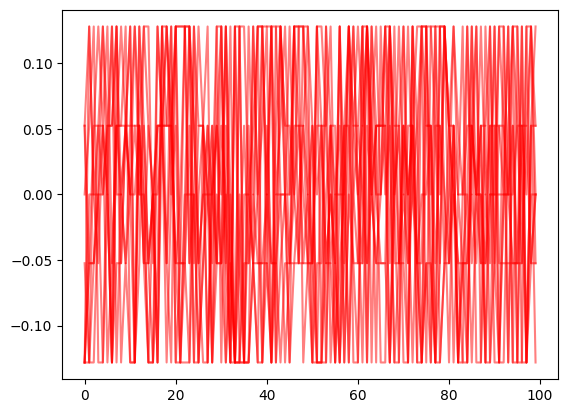

In [8]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [9]:
sim = simulate(model, dr, i0=1, N=100)

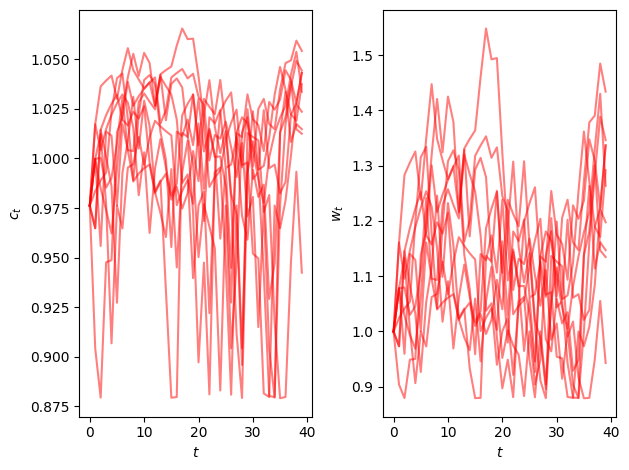

In [10]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [11]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, '$w$')

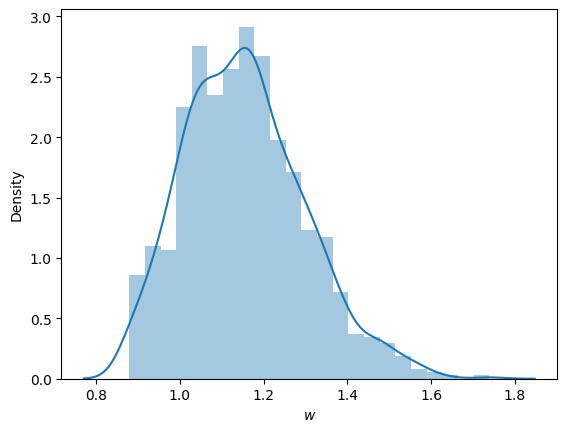

In [12]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [13]:
tab = tabulate(model, dr,'w')

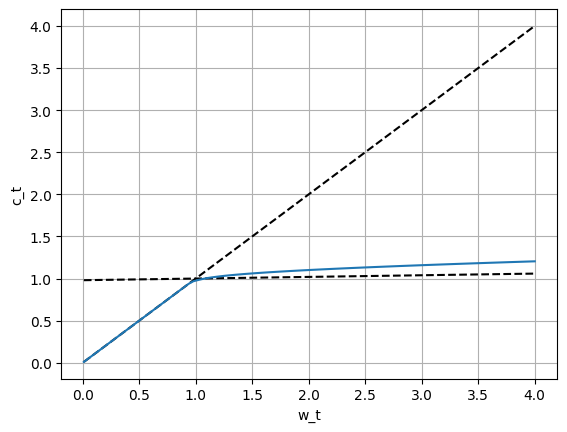

In [14]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()